# Introduction to Machine Learning
## Homework 2
### Author: Xinyu Liu

In [33]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

##### Import data and process

In [2]:
bidenraw=pd.read_csv('problem-set-2/nes2008.csv')
bidenraw.describe()

,biden,female,age,educ,dem,rep
count,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000
mean,62.163807,0.552850,47.535141,13.360266,0.431655,0.205313
std,23.462034,0.497337,16.887444,2.440257,0.495444,0.404042
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,34.000000,12.000000,0.000000,0.000000
50%,60.000000,1.000000,47.000000,13.000000,0.000000,0.000000
75%,85.000000,1.000000,59.500000,16.000000,1.000000,0.000000
max,100.000000,1.000000,93.000000,17.000000,1.000000,1.000000


In [34]:
x = np.array(bidenraw[['female','age','educ','dem','rep']])
y = np.array(bidenraw[['biden']])

In [35]:
bidenraw[['female','age','educ','dem','rep']].columns

Index(['female', 'age', 'educ', 'dem', 'rep'], dtype='object')

##### Plot the scatter graph for biden against each variable

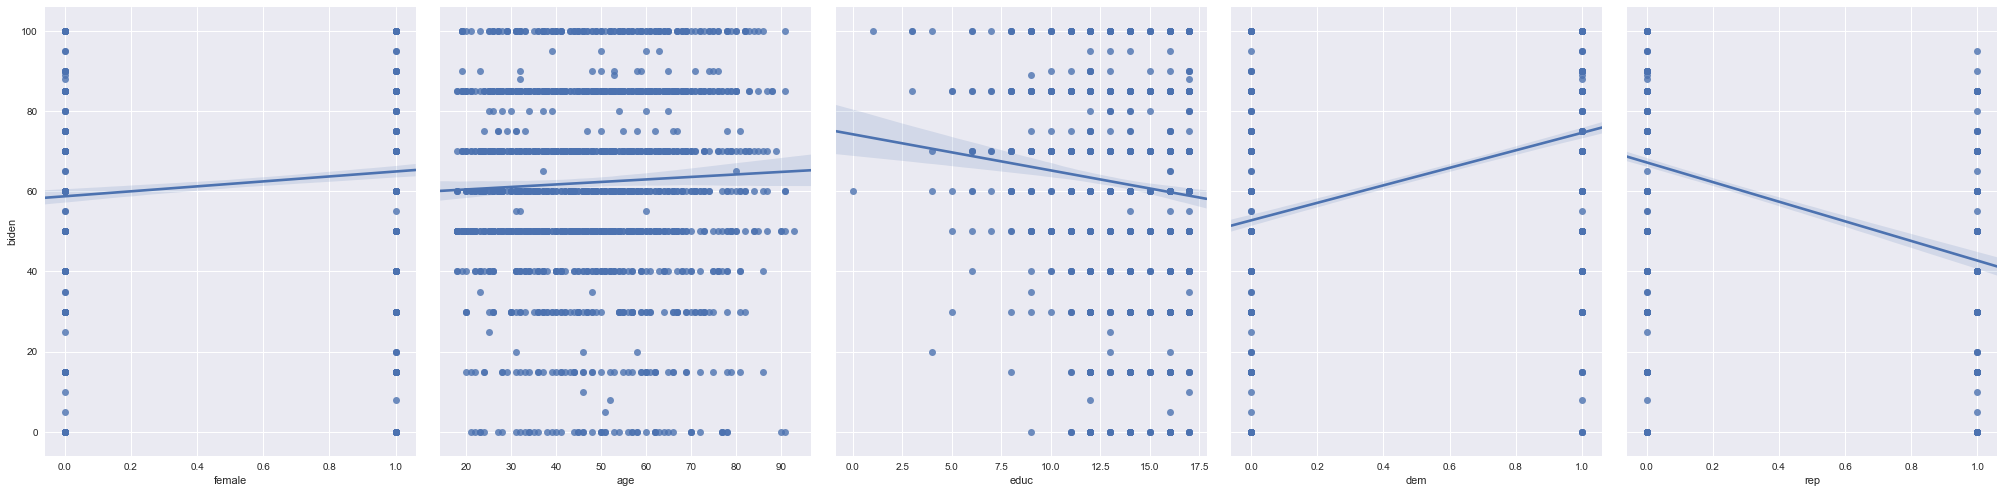

In [45]:
import seaborn as sns
%matplotlib inline
sns.pairplot(bidenraw, x_vars=['female','age','educ','dem','rep'], y_vars='biden', size=7, aspect=0.8, kind='reg')

In [46]:
# Alternatively this is a simple way to fit linear model:
# SKlearn with simple but not enough statistic summary
#     model = LinearRegression()
#     model.fit(x, y)
#     r_sq = model.score(x, y)
#     r_sq

#### 1. Estimate the MSE of the model using the traditional approach. 
- Typically, this is desirable when there is a need for more detailed results.
- Need to add the column of ones to the inputs if you want statsmodels to calculate the intercept 𝑏₀. 

In [83]:
x = bidenraw[['female','age','educ','dem','rep']]
y = bidenraw[['biden']]

In [84]:
# Add the column of ones to the inputs
x = sm.add_constant(x)
# Create a model and fit it
model = sm.OLS(y, x)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  biden   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     141.1
Date:                Sat, 01 Feb 2020   Prob (F-statistic):          1.50e-126
Time:                        15:40:16   Log-Likelihood:                -7966.6
No. Observations:                1807   AIC:                         1.595e+04
Df Residuals:                    1801   BIC:                         1.598e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.8113      3.124     18.823      0.000      52.683      64.939
female         4.1032      0.948      4.327      0.000       2.243       5.963
age            0.0483      0.028      1.708      0.088      -0.007       0.104
educ          -0.3453      0.195     -1.773      0.076      -0.727       0.037
dem           15.4243      1.068     14.442      0.000      13.330      17.519
rep          -15.8495      1.311    -12.086      0.000     -18.421     -13.278
==============================================================================
Omnibus:                       87.979   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.940
Skew:                          -0.533   Prob(JB):                     7.31e-23
Kurtosis:                       3.466   Cond. No.                         348.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Calculate MSE

In [43]:
# results.mse_total
y_pred = results.predict(x)
metrics.mean_squared_error(y,y_pred)

395.2701692786484

##### Discussion

One biggest caveat is that this calculation is not appropriate in the first place in that the model is based on the whole sample set and therefore is a biased and poor estimate of error. 

#### 2. Calculate the test MSE of the model using the simple holdout validation approach

#####  Split the sample set into a training set (50%) and a holdout set (50%)

In [78]:
X = bidenraw[['female','age','educ','dem','rep']]
y = bidenraw[['biden']]
from sklearn.model_selection import train_test_split

#####  Be sure to set your seed prior to this part of your code to guarantee reproducibility of results

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.5)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(903, 5)
(903, 1)
(904, 5)
(904, 1)


#####  Fit the linear regression model using only the training observations

In [82]:
# Add the column of ones to the inputs
X_train = sm.add_constant(X_train)
# Create a model and fit it
mlmodel2 = sm.OLS(y_train, X_train)
mlresults2 = mlmodel2.fit()
mlresults2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  biden   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     70.40
Date:                Sat, 01 Feb 2020   Prob (F-statistic):           3.61e-62
Time:                        15:40:08   Log-Likelihood:                -3963.2
No. Observations:                 903   AIC:                             7938.
Df Residuals:                     897   BIC:                             7967.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.0910      4.370     12.836      0.000      47.515      64.667
female         4.1864      1.309      3.197      0.001       1.617       6.756
age            0.0921      0.040      2.310      0.021       0.014       0.170
educ          -0.3883      0.268     -1.448      0.148      -0.914       0.138
dem           16.8127      1.485     11.320      0.000      13.898      19.728
rep          -12.7175      1.810     -7.024      0.000     -16.271      -9.164
==============================================================================
Omnibus:                       28.751   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.229
Skew:                          -0.414   Prob(JB):                     1.65e-07
Kurtosis:                       3.382   Cond. No.                         349.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Calculate the MSE using only the test set observation

In [81]:
# Use model created from training set to predict based on test set
X_test = sm.add_constant(X_test)
y_pred = mlresults.predict(X_test)
metrics.mean_squared_error(y_test,y_pred)

411.85958298595153

##### How does this value compare to the training MSE from question 1? 

Clearly there the MSE from question 1 is a determined number, as long as the data set is given. However, the MSE using simple random split in question 2 varies from different random seeds. The random characteristic of MSE in question 2 is the major reason to implement approach in question 3.

#### 3.  Repeat the simple validation set approach from the previous question 1000 times, using 1000 diﬀerent splits of the observations into a training set and a test/validation set. 

In [16]:
import warnings
warnings.filterwarnings('ignore')

X = bidenraw[['female','age','educ','dem','rep']]
y = bidenraw[['biden']]
from sklearn.model_selection import train_test_split
from sklearn import metrics
ml1000mse = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i, test_size=0.5)
    # Add the column of ones to the inputs
    X_train = sm.add_constant(X_train)
    # Create a model and fit it
    mlmodel = sm.OLS(y_train, X_train)
    mlresults = mlmodel.fit()
    X_test = sm.add_constant(X_test)
    y_pred = mlresults.predict(X_test)
    ml1000mse.append(metrics.mean_squared_error(y_test, y_pred))
    

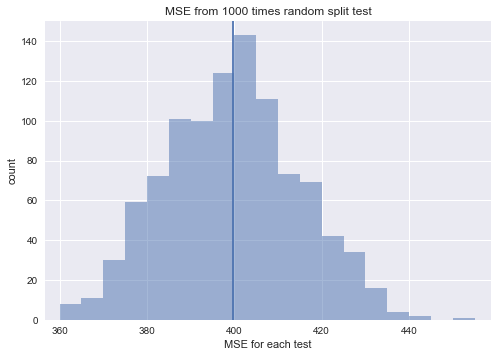

In [29]:
# fixed bin size
from matplotlib import pyplot as plt
plt.style.use('seaborn')
bins = np.arange(300, 500, 5) # fixed bin size
plt.xlim([min(ml1000mse)-5, max(ml1000mse)+5])
plt.hist(ml1000mse, bins=bins, alpha=0.5)
plt.axvline(np.asarray(ml1000mse).mean())
plt.title('MSE from 1000 times random split test')
plt.xlabel('MSE for each test')
plt.ylabel('count')
plt.show()

##### Description of histogram and comments

First the MSE ditribution of 1000 times tests takes a form of normal distribution like shape, exhiniting the effect of central limit theorem. The result also expalins the point of repeated randomized split test, which is to provide a consistent estimate of the model and therefore are more reliable when making inference about the population. The mean of MSE is 399.6, which is quite stable regardless which randomization seed we set.  

In [18]:
np.asarray(ml1000mse).mean()

399.6615061066422

#### 4. Compare the estimated parameters and standard errors from the original model in question 1 (the model estimated using all of the available data) to parameters and standard errors estimated using the bootstrap (B =1000).

In [73]:
# scikit-learn bootstrap
from sklearn.utils import resample
# data sample
# prepare bootstrap sample
boot = resample(bidenraw, replace=True, n_samples=1000, random_state=1)

# out of bag observations
oob=pd.concat([bidenraw, boot]).drop_duplicates(keep=False)
# population = np.random.normal(loc=mean, scale=stdev, size=50000)

In [69]:
# Add the column of ones to the inputs
X_train = boot[['female','age','educ','dem','rep']]
y_train = boot[['biden']]
X_train = sm.add_constant(X_train)
# Create a model and fit it
mlmodel = sm.OLS(y_train, X_train)
mlresults = mlmodel.fit()
mlresults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  biden   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     75.23
Date:                Sat, 01 Feb 2020   Prob (F-statistic):           6.49e-67
Time:                        15:25:56   Log-Likelihood:                -4423.9
No. Observations:                1000   AIC:                             8860.
Df Residuals:                     994   BIC:                             8889.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.2631      4.323     13.245      0.000      48.779      65.747
female         3.1547      1.287      2.450      0.014       0.628       5.681
age            0.0977      0.039      2.478      0.013       0.020       0.175
educ          -0.4160      0.263     -1.584      0.114      -0.931       0.099
dem           15.7901      1.453     10.871      0.000      12.940      18.641
rep          -15.0100      1.802     -8.328      0.000     -18.547     -11.473
==============================================================================
Omnibus:                       19.051   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.695
Skew:                          -0.324   Prob(JB):                     5.29e-05
Kurtosis:                       3.231   Cond. No.                         346.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
X_test = oob[['female','age','educ','dem','rep']]
y_test = oob[['biden']]
# Use model created from training set to predict based on test set
X_test = sm.add_constant(X_test)
y_pred = mlresults.predict(X_test)
metrics.mean_squared_error(y_test,y_pred)

422.4466985286168

##### Description of coefficient and std

In [99]:
Comparision = pd.DataFrame()
Comparision['Q1_coefficient'] = results.params
Comparision['Q4_coefficient'] = mlresults.params
Comparision['Q1_se'] = results.bse
Comparision['Q4_se'] = mlresults.bse
Comparision['Q1_p'] = results.pvalues
Comparision['Q4_p'] = mlresults.pvalues
Comparision

,Q1_coefficient,Q4_coefficient,Q1_se,Q4_se,Q1_p,Q4_p
const,58.811259,57.263108,3.124437,4.323418,2.694143e-72,5.384052e-37
female,4.103230,3.154657,0.948229,1.287427,1.592601e-05,1.444293e-02
age,0.048259,0.097724,0.028247,0.039430,8.772744e-02,1.336097e-02
educ,-0.345335,-0.416020,0.194780,0.262651,7.640571e-02,1.135282e-01
dem,15.424256,15.790141,1.068033,1.452559,8.144928e-45,4.370008e-26
rep,-15.849506,-15.009987,1.311362,1.802393,2.157309e-32,2.706188e-16


##### Discussion

The bootstrap method is a resampling technique for estimating a sampling distribution. The idea of the bootstrap method is to generate new data from a “population” by repeated sampling from data with replacement. According to the result we can see that in a large sense (sign and magnitude) coefficients from Q1 and Q4 remain compariable. However, when taking a closer look, some coefficient do show different confidence interval such as age. It is understandable to see some small difference are the assumption for bootstrap is that every observation in the sample set has equal posibility to be chosen. This is an implicit generalization of the greater population. In bootstrapping, we take the sample we have and sample from it, whereas Q1 use the whole sample set directly. We can also calculate the MSE of Q4 which is 422, greater (or more precisely less stable) than Q1's MSE.

In [102]:

import pdfkit


path_wkthmltopdf = "F:\\向菁\\wkhtmltopdf\\bin\\"
config = pdfkit.configuration(wkhtmltopdf = path_wkthmltopdf)

pdfkit.from_file("biden.ipynb", "out.pdf", configuration=config)

OSError: No wkhtmltopdf executable found: "F:\向菁\wkhtmltopdf\bin\"
If this file exists please check that this process can read it. Otherwise please install wkhtmltopdf - https://github.com/JazzCore/python-pdfkit/wiki/Installing-wkhtmltopdf